*Digit Recognizer* 🚦 🎱
=====

Reference
- Kaggle'PCA decomposition and Keras neural network' by PIOTR MILEWSKI : https://www.kaggle.com/code/pmmilewski/pca-decomposition-and-keras-neural-network

# PCA + Neural Network

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
# load data
X = pd.read_csv('input/train.csv')
y = X.iloc[:,0]

## Split Data

In [3]:
ratio = 25 # Split ratio(Test Sets Ratio)[%]
ratio = ratio/100

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, shuffle=True, random_state=99)

In [5]:
print(y_train.value_counts().sort_index())
print(y_train.count())
train_No = y_train.count()
print(y_test.value_counts().sort_index())
print(y_test.count())
test_No = y_test.count()

0    3104
1    3498
2    3108
3    3230
4    3085
5    2871
6    3086
7    3326
8    3077
9    3115
Name: label, dtype: int64
31500
0    1028
1    1186
2    1069
3    1121
4     987
5     924
6    1051
7    1075
8     986
9    1073
Name: label, dtype: int64
10500


## PCA

In [6]:
# Scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train.iloc[:,1:])
X_sc_train = scaler.transform(X_train.iloc[:,1:])
X_sc_test = scaler.transform(X_test.iloc[:,1:])

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Wall time: 7.3 s


Text(0, 0.5, 'Cumulative explained variance')

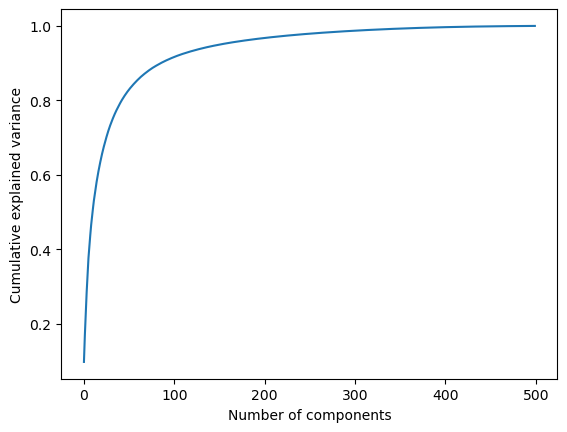

In [7]:
%%time
#for selecting number of components
pca = sklearn.decomposition.PCA(n_components=500)
pca.fit(X_train.iloc[:,1:])

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [8]:
%%time
NCOMPONENTS = 500

pca = sklearn.decomposition.PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

Wall time: 4.75 s


In [9]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)
inv_nr = sklearn.preprocessing.normalize(inv_pca)
inv_pca2 = pca.inverse_transform(X_pca_test)
inv_sc2 = scaler.inverse_transform(inv_pca2)
inv_nr2 = sklearn.preprocessing.normalize(inv_pca2)

## Neural Network

### None-scale

In [10]:
train_images = inv_pca.reshape((train_No, 28, 28, 1))
test_images = inv_pca2.reshape((test_No, 28, 28, 1))

In [11]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(20, (5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))
 
model_2.add(layers.Flatten())
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.summary()
 
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_2.fit(train_images, y_train, epochs=5)
test_loss, test_acc = model_2.evaluate(test_images, y_test, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 20)          0         
                                                                 
 flatten (Flatten)           (None, 320)               0

### Standard scaler

In [12]:
train_images2 = inv_sc.reshape((train_No, 28, 28, 1))
test_images2 = inv_sc2.reshape((test_No, 28, 28, 1))

In [13]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(20, (5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))
 
model_2.add(layers.Flatten())
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.summary()
 
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_2.fit(train_images2, y_train, epochs=5)
test_loss, test_acc = model_2.evaluate(test_images2, y_test, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 20)          0         
                                                                 
 flatten_1 (Flatten)         (None, 320)              

### Normalize

In [14]:
train_images3 = inv_nr.reshape((train_No, 28, 28, 1))
test_images3 = inv_nr2.reshape((test_No, 28, 28, 1))

In [15]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(20, (5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))
 
model_2.add(layers.Flatten())
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.summary()
 
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_2.fit(train_images3, y_train, epochs=5)
test_loss, test_acc = model_2.evaluate(test_images3, y_test, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 20)          0         
                                                                 
 flatten_2 (Flatten)         (None, 320)              

### 2nd Model

In [16]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(128, (5, 5), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Dropout(0.25))
 
model_4.add(layers.Flatten())
model_4.add(layers.Dense(100, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))
model_4.summary()
 
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_4.fit(train_images, y_train, epochs=5)
test_loss, test_acc = model_4.evaluate(test_images, y_test, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 128)         0         
                                                                 
 flatten_3 (Flatten)         (None, 2048)             

### 3rd Model

In [26]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_trainN = to_categorical(y_train)
y_testN = to_categorical(y_test)

# network parameters
input_size = inv_pca.shape[1]
batch_size = 64
dropout = 0.25

In [27]:
# this model is a 3-layer MLP with ReLU and dropout after each layer
model_1 = tf.keras.models.Sequential()
model_1.add(layers.Dense(256, input_dim=input_size))
model_1.add(layers.Activation('relu'))
model_1.add(layers.Dropout(dropout))
model_1.add(layers.Dense(64))
model_1.add(layers.Activation('relu'))
model_1.add(layers.Dropout(dropout))
model_1.add(layers.Dense(num_labels))
model_1.add(layers.Activation('softmax'))
model_1.summary()

# loss function for one-hot vector using adam optimizer
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the model
model_1.fit(inv_pca, y_trainN, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model_1.evaluate(inv_pca2, y_testN, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 256)               200960    
                                                                 
 activation_11 (Activation)  (None, 256)               0         
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                16448     
                                                                 
 activation_12 (Activation)  (None, 64)                0         
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 10)               